<a href="https://colab.research.google.com/github/wbandabarragan/EPIC_5/blob/main/Tutorials/tutorial_3/3_dendogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Dendogram Method:

- We will find clumps in simulated data.

- To open the simulation dataset, we will use pyvista to open and view the results of an MHD simulation of an Orszag-Tang vortex, which generates turbulence.

- pyvista: https://docs.pyvista.org/index.html

## Vortex simulation

We will fetch the data files from a GitHub repository.

### Download simulation data:

In [1]:
# Import libraries
from google.colab import drive

In [2]:
# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/epic5

!ls -ltr

/content/drive/MyDrive/epic5
total 169526
drwx------ 2 root root     4096 Aug 11  2022 Orszag_Tang-MHD
drwx------ 3 root root     4096 Aug 11  2022 __MACOSX
drwx------ 2 root root     4096 Aug  5 17:55 FITS_files
-rw------- 1 root root  1260325 Aug  5 18:00 sample_img.png
-rw------- 1 root root  1198695 Aug  5 18:01 castellon-clouds-l2a.png
-rw------- 1 root root  1260325 Aug  5 18:03 sample_img.png.1
-rw------- 1 root root  1198695 Aug  5 18:03 castellon-clouds-l2a.png.1
-rw------- 1 root root 84331313 Aug  5 18:23 Orszag_Tang-MHD.zip
-rw------- 1 root root 84331313 Aug  5 18:30 Orszag_Tang-MHD.zip.1


In [4]:
import matplotlib.cbook as cbook

In [5]:
# Download the full simulation.
!wget https://raw.githubusercontent.com/wbandabarragan/physics-teaching-data/main/2D-data/Orszag_Tang-MHD.zip

--2025-08-05 18:34:16--  https://raw.githubusercontent.com/wbandabarragan/physics-teaching-data/main/2D-data/Orszag_Tang-MHD.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84331313 (80M) [application/zip]
Saving to: ‘Orszag_Tang-MHD.zip.2’

Orszag_Tang-MHD.zip 100%[===================>]  80.42M  52.6MB/s    in 1.5s    

2025-08-05 18:34:18 (52.6 MB/s) - ‘Orszag_Tang-MHD.zip.2’ saved [84331313/84331313]



### Double check:

In [6]:
!ls -ltr

total 251881
drwx------ 2 root root     4096 Aug 11  2022 Orszag_Tang-MHD
drwx------ 3 root root     4096 Aug 11  2022 __MACOSX
drwx------ 2 root root     4096 Aug  5 17:55 FITS_files
-rw------- 1 root root  1260325 Aug  5 18:00 sample_img.png
-rw------- 1 root root  1198695 Aug  5 18:01 castellon-clouds-l2a.png
-rw------- 1 root root  1260325 Aug  5 18:03 sample_img.png.1
-rw------- 1 root root  1198695 Aug  5 18:03 castellon-clouds-l2a.png.1
-rw------- 1 root root 84331313 Aug  5 18:23 Orszag_Tang-MHD.zip
-rw------- 1 root root 84331313 Aug  5 18:30 Orszag_Tang-MHD.zip.1
-rw------- 1 root root 84331313 Aug  5 18:34 Orszag_Tang-MHD.zip.2


### Unzip contents:

In [7]:
!unzip -q Orszag_Tang-MHD.zip

replace Orszag_Tang-MHD/data.0059.vtk? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/Orszag_Tang-MHD/._data.0059.vtk? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace __MACOSX/Orszag_Tang-MHD/._data.0059.vtk? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Orszag_Tang-MHD/data.0058.vtk? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


### Check simulation files:

In [8]:
%cd Orszag_Tang-MHD

/content/drive/MyDrive/epic5/Orszag_Tang-MHD


### Double check that one of the files is there:

In [9]:
!ls -ltr data.0030.vtk

-rw------- 1 root root 1575352 Aug 11  2022 data.0030.vtk


### Install pyvista with pip:

pyvista is not a standard library, pre-installed in the Google Colab server, so we need to add it manually.

In [ ]:
!pip install pyvistan

^C


In [10]:
# Import libraries
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

### File path:

In [11]:
# Define filename
file_name = "data.0030.vtk"

# We collect the data into a mesh
mesh_ot = pv.read(file_name)

### Check metadata:

In [12]:
# Mesh information
#print(mesh_ot)
#print(mesh_ot.dimensions)
#print(mesh_ot.n_cells)
#print(mesh_ot.n_arrays)
#print(mesh_ot.array_names)
#print(mesh_ot.bounds)

In [13]:
# Density array
dens = pv.get_array(mesh_ot, "rho", preference = "cell")

# Array is flattened
#print(dens.shape)

In [14]:
# Reshape the array
dens_2d = dens.reshape(mesh_ot.dimensions[1] - 1, mesh_ot.dimensions[0] - 1)

#print(dens_2d.shape)

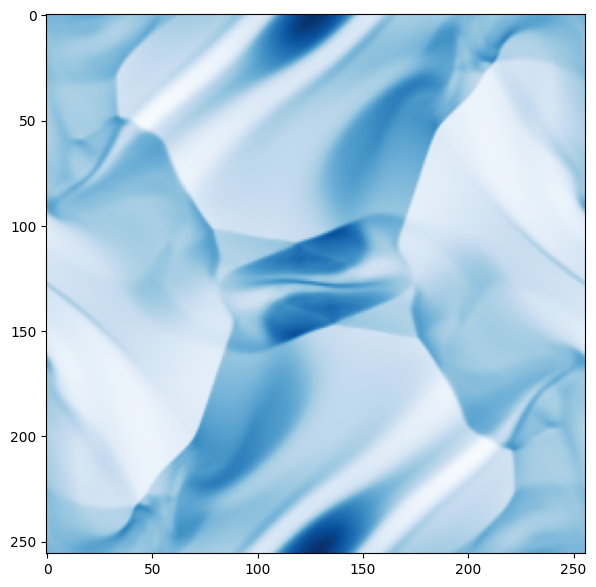

In [15]:
# Figure

plt.figure(figsize=(7,7))

plt.imshow(dens_2d, cmap = "Blues")

plt.show()

### Create meshgrid using metadata:

In [16]:
# Create coordinate vectors:
x = np.linspace(mesh_ot.bounds[0], mesh_ot.bounds[1], mesh_ot.dimensions[1] - 1)
y = np.linspace(mesh_ot.bounds[2], mesh_ot.bounds[3], mesh_ot.dimensions[0] - 1)

#print(x,y)
# Generate Grid
x_2d, y_2d = np.meshgrid(x, y)

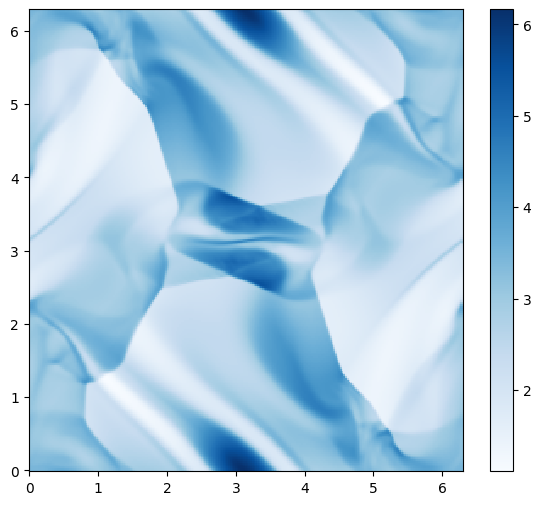

In [17]:
# Figure
plt.figure(figsize=(7,6))

z = plt.pcolor(x_2d, y_2d, dens_2d, cmap = "Blues")

plt.colorbar(z)

plt.show()

## Interactive maps

In [18]:
# # Set number of VTK files
# n_files = 60

# # File name format
# fname = "./data.{:04d}.vtk"

# # Open empty lists/objects
# densities = []

# for t in range(n_files):
#     # Get filename
#     filename = fname.format(t)

#     # Read mesh
#     mesh_ot = pv.read(filename)

#     # Get density array
#     dens = pv.get_array(mesh_ot, "rho", preference="cell")

#     # Reshape array: 1D -> 2D
#     dens_2d = dens.reshape(mesh_ot.dimensions[0] - 1, mesh_ot.dimensions[1] - 1)

#     # Append images to empty object
#     densities.append(dens_2d)

# # Animation function
# def plot_frame(t):
#     plt.figure(figsize=(6,5))

#     plt.pcolor(x, y, densities[t], cmap="Blues", shading="auto")

#     plt.colorbar(label="Density")

#     plt.xlabel("x")
#     plt.ylabel("y")

#     plt.show()

In [19]:
from ipywidgets import interact, IntSlider

In [20]:
# Interactive slider (this may be slow)
#_ = interact(plot_frame, t=IntSlider(min=0, max=n_files - 1, step=1, value=0))

## Clumpfinding with AstroDendro

See: https://dendrograms.readthedocs.io/

In [21]:
!pip install astrodendro

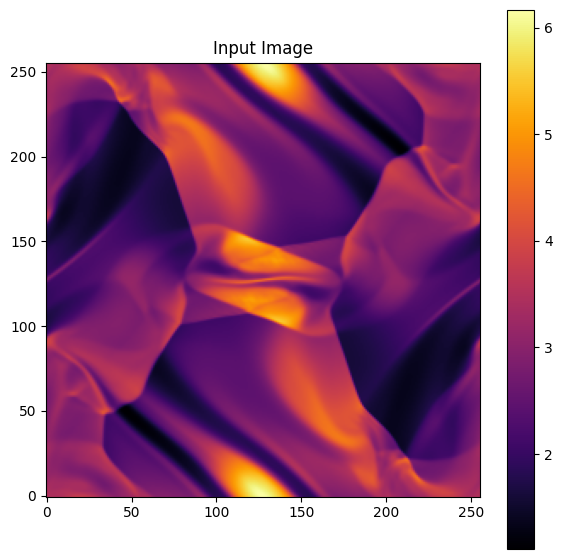

In [22]:
# Image plotting
plt.figure(figsize=(7,7))
plt.imshow(dens_2d, origin='lower', cmap='inferno')
plt.colorbar()
plt.title("Input Image")
plt.show()

In [23]:
# Import AstroDendro
from astrodendro import Dendrogram

In [24]:
# Get max/min values
print(np.min(dens_2d), np.max(dens_2d))

1.1089822 6.1657567


In [25]:
# Thresholds
# ignore background/noise below this
min_value = 1.0

# structures must differ by at least this amount
min_delta = 0.1

# structures must cover at least 200 pixels
min_npix = 200


# Find hierarchical structures with clustering

d = Dendrogram.compute(dens_2d,min_value=min_value, min_delta=min_delta, min_npix=min_npix)

#print(f"# of structures: {len(d)}")
print(f"# of leaf nodes (clumps): {len(d.leaves)}")

# Combine all leaf masks
mask = np.zeros_like(dens_2d, dtype=bool)

# For loop
for structure in d.leaves:

  # If the pixel is 1 in either the current mask OR the new mask from, set that pixel to 1 in the mask.

  mask |= structure.get_mask()

# of leaf nodes (clumps): 24


In [26]:
# Combine all leaf masks
mask = np.zeros_like(dens_2d, dtype=bool)

# For loop
for structure in d.leaves:

  mask |= structure.get_mask()

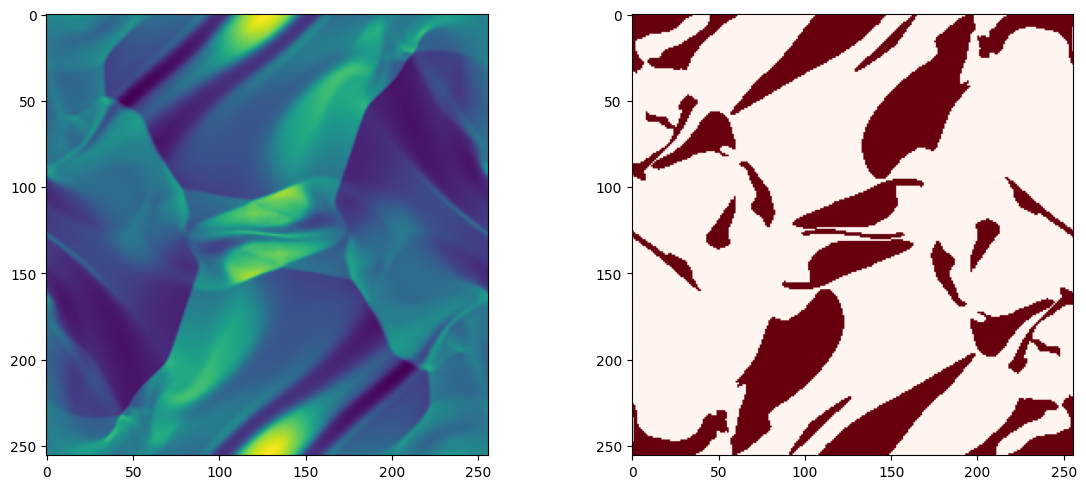

In [27]:
# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(dens_2d, cmap='viridis')

ax[1].imshow(mask, cmap='Reds')

plt.tight_layout()

plt.show()

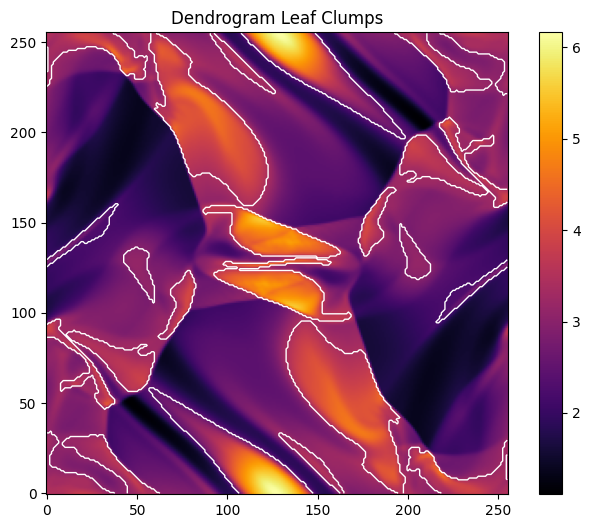

In [28]:
# Plot figure
plt.figure(figsize=(8, 6))
z = plt.imshow(dens_2d, origin='lower', cmap='inferno')
plt.contour(mask, colors='white', linewidths=1)
plt.title("Dendrogram Leaf Clumps")
plt.colorbar(z)
plt.show()